# Parse BPMN File to Networkx Graph
Yahya Poursoltani

# XML Parser : List of Tasks

In [1]:
import networkx as nx
from xml.dom import minidom
data = minidom.parse("dataset/gateway_graphs/graph_11_false_example.bpmn");
process_graph= nx.MultiDiGraph()

## Gateways 

### extract gateways

In [2]:
xors= data.getElementsByTagName('exclusiveGateway')
ors= data.getElementsByTagName('inclusiveGateway')
parallels= data.getElementsByTagName('parallelGateway')

### create gateways nodes

In [3]:
for xor in xors:
    process_graph.add_node(str(xor.attributes['id'].value),
                         node_id= xor.attributes['id'].value,
                         node_type='xor_gateway')
for parallel in parallels:
    process_graph.add_node(str(parallel.attributes['id'].value),
                         node_id= parallel.attributes['id'].value,
                         node_type='parallel_gateway')

for inor in ors:
    process_graph.add_node(str(inor.attributes['id'].value),
                          node_id=inor.attributes['id'].value,
                          node_type='or_gateway')
      

## Events

### extract events

In [4]:
intermediate_events_thrown= data.getElementsByTagName('intermediateThrowEvent')
intermediate_events_catched= data.getElementsByTagName('intermediateCatchEvent')
startEvents= data.getElementsByTagName('startEvent')
endEvents= data.getElementsByTagName('endEvent')
intermediate_events= intermediate_events_catched+intermediate_events_thrown

### create event nodes

In [5]:
for se in startEvents:
    process_graph.add_node(str(se.attributes['id'].value),
                         node_id= se.attributes['id'].value,
                         node_type='start_event')


for inter in intermediate_events:
    process_graph.add_node(str(inter.attributes['id'].value),
                              node_id=inter.attributes['id'].value,
                          node_type='intermediate_gateway')
    
for ee in endEvents:
    process_graph.add_node(str(ee.attributes['id'].value),
                         node_id= ee.attributes['id'].value,
                         node_type='end_event')


## Activities

### extract activities

In [6]:
tasks= data.getElementsByTagName('task')
user_tasks= data.getElementsByTagName('userTask')
service_tasks= data.getElementsByTagName('serviceTask')
send_tasks= data.getElementsByTagName('sendTask')
script_tasks= data.getElementsByTagName('scriptTask')
manual_tasks= data.getElementsByTagName('manualTask')
business_rule_tasks= data.getElementsByTagName('businessRuleTask')

In [7]:

activities = tasks+user_tasks+service_tasks+send_tasks+script_tasks+manual_tasks+business_rule_tasks
boundry_tasks=[]

### Handling Boundry events

In [8]:
for task in activities:
    process_graph.add_node(str(task.attributes['id'].value),
                         node_id= task.attributes['id'].value,
                         node_lable=task.attributes['name'].value,
                         node_type='activity')


In [9]:
boundry_events= data.getElementsByTagName('boundaryEvent')
boundry_event_id=[]
for be in boundry_events:
    if process_graph.has_node(be.attributes['attachedToRef'].value):
        process_graph.remove_node(be.attributes['attachedToRef'].value)
        
    process_graph.add_node(str(be.attributes['attachedToRef'].value),
                         node_id= be.attributes['id'].value,
                         task_id=be.attributes['attachedToRef'].value,
                         node_type='boundry_activity')
    boundry_event_id.append(be.attributes['id'].value)

In [10]:
for be in endEvents:
    process_graph.add_node(str(ee.attributes['id'].value),
                         node_id= ee.attributes['id'].value,
                         node_type='end_event')
list(process_graph.nodes(data=True))

[('Id_5f76b960-679c-4a04-9821-83d448b05954',
  {'node_id': 'Id_5f76b960-679c-4a04-9821-83d448b05954',
   'node_type': 'xor_gateway'}),
 ('Id_04392c03-246b-466b-a860-641b7c47e385',
  {'node_id': 'Id_04392c03-246b-466b-a860-641b7c47e385',
   'node_type': 'parallel_gateway'}),
 ('Id_cf814e58-ad10-4ac6-9642-13713c16d6e7',
  {'node_id': 'Id_cf814e58-ad10-4ac6-9642-13713c16d6e7',
   'node_type': 'parallel_gateway'}),
 ('Id_61547d6d-34b5-43bd-acd7-285d5a41cb81',
  {'node_id': 'Id_61547d6d-34b5-43bd-acd7-285d5a41cb81',
   'node_type': 'parallel_gateway'}),
 ('Id_c0725361-291b-4633-afa1-f4d0bac01123',
  {'node_id': 'Id_c0725361-291b-4633-afa1-f4d0bac01123',
   'node_type': 'parallel_gateway'}),
 ('Id_14e105b5-0f8e-4dbd-abef-2063e3a1b066',
  {'node_id': 'Id_14e105b5-0f8e-4dbd-abef-2063e3a1b066',
   'node_type': 'parallel_gateway'}),
 ('Id_0c57f133-6cd3-47bb-9272-c231adbe8a3d',
  {'node_id': 'Id_0c57f133-6cd3-47bb-9272-c231adbe8a3d',
   'node_type': 'start_event'}),
 ('Id_d08997df-77f9-453d-8f4c-

# List of Arcs

In [11]:
arcs= data.getElementsByTagName("sequenceFlow")
edges=[]

In [12]:
for arc in arcs:
    #print('id:',arc.attributes['id'].value)
    source = arc.attributes['sourceRef'].value
    target = arc.attributes['targetRef'].value
    edges.append((source,target))
    
for edge in edges:
    print(edge)

('Id_04392c03-246b-466b-a860-641b7c47e385', 'Id_d08997df-77f9-453d-8f4c-adf14e7c2e20')
('Id_0c57f133-6cd3-47bb-9272-c231adbe8a3d', 'Id_cf814e58-ad10-4ac6-9642-13713c16d6e7')
('Id_04392c03-246b-466b-a860-641b7c47e385', 'Id_cf814e58-ad10-4ac6-9642-13713c16d6e7')
('Id_61547d6d-34b5-43bd-acd7-285d5a41cb81', 'Id_14e105b5-0f8e-4dbd-abef-2063e3a1b066')
('Id_14e105b5-0f8e-4dbd-abef-2063e3a1b066', 'Id_c0725361-291b-4633-afa1-f4d0bac01123')
('Id_14e105b5-0f8e-4dbd-abef-2063e3a1b066', 'Id_5f76b960-679c-4a04-9821-83d448b05954')
('Id_5f76b960-679c-4a04-9821-83d448b05954', 'Id_c0725361-291b-4633-afa1-f4d0bac01123')
('Id_61547d6d-34b5-43bd-acd7-285d5a41cb81', 'Id_5f76b960-679c-4a04-9821-83d448b05954')
('Id_c0725361-291b-4633-afa1-f4d0bac01123', 'Id_04392c03-246b-466b-a860-641b7c47e385')
('Id_cf814e58-ad10-4ac6-9642-13713c16d6e7', 'Id_61547d6d-34b5-43bd-acd7-285d5a41cb81')


In [13]:
process_graph.add_edges_from(edges)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Draw Graph

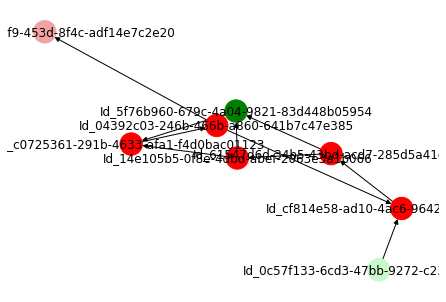

In [14]:
def draw_process_graph(processGraph):
    nodes_color_map=[]
    for node in list(processGraph.nodes):
        if processGraph.nodes[node]["node_type"]== "activity":
            nodes_color_map.append("blue")
        elif processGraph.nodes[node]["node_type"]== "boundry_activity":
            nodes_color_map.append("orange")
        elif processGraph.nodes[node]["node_type"]== "parallel_gateway":
            nodes_color_map.append("red")
        elif processGraph.nodes[node]["node_type"]== "xor_gateway":
            nodes_color_map.append("green")
        elif processGraph.nodes[node]["node_type"]== "or_gateway":
            nodes_color_map.append("green")
        elif processGraph.nodes[node]["node_type"]== "intermediate_event":
            nodes_color_map.append("purple")
        elif processGraph.nodes[node]["node_type"]== "start_event":
            nodes_color_map.append("#c8f8cb")
        elif processGraph.nodes[node]["node_type"]== "end_event":
            nodes_color_map.append("#f1a2a2")
    nx.draw(processGraph,node_size=500,node_color=nodes_color_map,with_labels=True)
draw_process_graph(process_graph)

# Basic Functions

## Check for join Node Matching

In [15]:
def match_nodes(process_graph,split_node,join_node):
    match = True
    reverse_graph = process_graph.reverse(copy= True)
    privious_nodes = list(reverse_graph.neighbors(join_node))
    for nod in privious_nodes:
        if nod != split_node:
            match = False
    return match

## Check for and/or split/join

In [16]:
def is_and_split(process_graph,node_id):
    has_this_node= node_id in process_graph
    is_and=False
    deg_state=False
    
    if process_graph.nodes[node_id]["node_type"] == "parallel_gateway":
        is_and=True
    
    if process_graph.in_degree(node_id) == 1 and process_graph.out_degree(node_id)>=1:
        deg_state=True
        
    return has_this_node and is_and and deg_state

In [17]:
def is_and_join(process_graph,node_id):
    has_this_node= node_id in process_graph
    is_and=False
    deg_state=False
    
    if process_graph.nodes[node_id]["node_type"] == "parallel_gateway":
        is_and=True
    
    if process_graph.in_degree(node_id) >= 1 and process_graph.out_degree(node_id)==1:
        deg_state=True
        
    return has_this_node and is_and and deg_state

In [18]:
def is_or_split(process_graph,node_id):
    has_this_node= node_id in process_graph
    is_or=False
    deg_state=False
    
    if process_graph.nodes[node_id]["node_type"] == "or_gateway" or process_graph.nodes[node_id]["node_type"] == "xor_gateway":
        is_or=True
    
    if process_graph.in_degree(node_id) == 1 and process_graph.out_degree(node_id)>=1:
        deg_state=True
        
    return has_this_node and is_or and deg_state

In [19]:
def is_or_join(process_graph,node_id):
    has_this_node= node_id in process_graph
    is_or=False
    deg_state=False
    
    if process_graph.nodes[node_id]["node_type"] == "or_gateway" or process_graph.nodes[node_id]["node_type"] == "xor_gateway":
        is_or=True
    
    if process_graph.in_degree(node_id) >= 1 and process_graph.out_degree(node_id)==1:
        deg_state=True
        
    return has_this_node and is_or and deg_state

# Backward Analysis

In [20]:
def remove_and_reconnect(graph,node_id):
    reverse_graph = graph.reverse(copy= True)
    privious_nodes = list(reverse_graph.neighbors(node_id))
    next_nodes = list(graph.neighbors(node_id))
    for privious in privious_nodes:
        for next_node in next_nodes:
            graph.add_edge(privious,next_node)
            graph.remove_edge(privious,node_id)
            graph.remove_edge(node_id,next_node)
    graph.remove_node(node_id)
    return graph

In [21]:
def remove_pattern_subgraph(graph, node_id_1, node_id_2):
    pattern_subgraph = graph.subgraph([node_id_1,node_id_2])
    reverse_graph = graph.reverse(copy= True)
    privious_nodes = list(reverse_graph.neighbors(node_id_1))
    next_nodes = list(graph.neighbors(node_id_2))
    for privious in privious_nodes:
        for next_node in next_nodes:
            graph.add_edge(privious,next_node)
    
    for edg in list(pattern_subgraph.edges):
        graph.remove_edge(edg[0],edg[1])
    for nod in list(pattern_subgraph.nodes):
        graph.remove_node(nod)
    return graph

In [22]:
def is_all_graph_verified(process_graph):
    start_node = None
    end_node = None
    is_adj= False
    for nod in process_graph.nodes:
        if process_graph.nodes[nod]["node_type"] == "start_event":
            start_node = nod
        elif process_graph.nodes[nod]["node_type"] == "end_event":
            end_node = nod
    if (start_node != None) and (end_node != None) and (end_node in process_graph.neighbors(start_node)):
        is_adj = True
    return is_adj

## Pattern Detectors 

### OR- Patterns

In [23]:
def is_or_pattern(processGraph,node_id_1,node_id_2):
    is_adj=False
    is_node_type_correct = False
    degree_condition=False
    is_in_cycle=False
    
    node1 = processGraph.nodes[node_id_1]
    node2 = processGraph.nodes[node_id_2]
    cycles= list(nx.simple_cycles(processGraph))
    
    for cycle in cycles:
        if (node_id_1 in cycle) and (node_id_2 in cycle) and (len(cycle)==2):
            is_in_cycle= True
    
    is_adj= (node_id_1,node_id_2) in list(processGraph.edges())
    is_node_type_correct= is_or_split(processGraph,node_id_1) and is_or_join(processGraph,node_id_2)
    degree_condition = (processGraph.out_degree(node_id_1)>1) and (processGraph.in_degree(node_id_2)>1) 
    return is_adj and is_node_type_correct and degree_condition and (not(is_in_cycle)) and match_nodes(processGraph,node_id_1,node_id_2)

In [24]:
def is_and_pattern(processGraph,node_id_1,node_id_2):
    is_adj=False
    is_node_type_correct = False
    degree_condition=False
    
    node1 = processGraph.nodes[node_id_1]
    node2 = processGraph.nodes[node_id_2]
    
    is_adj= (node_id_1,node_id_2) in list(processGraph.edges())
    is_node_type_correct= is_and_split(processGraph,node_id_1) and is_and_join(processGraph,node_id_2)
    degree_condition = (processGraph.out_degree(node_id_1)>=1) and (processGraph.in_degree(node_id_2)>=1)
    return is_adj and is_node_type_correct and degree_condition and match_nodes(processGraph,node_id_1,node_id_2)

In [25]:
def is_iteration_pattern(processGraph,node_id_1,node_id_2):
    is_adj=False
    is_node_type_correct = False
    degree_condition=False
    is_in_cycle=False
    
    node1 = processGraph.nodes[node_id_1]
    node2 = processGraph.nodes[node_id_2]
    cycles= list(nx.simple_cycles(processGraph))
    
    for cycle in cycles:
        if (node_id_1 in cycle) and (node_id_2 in cycle) and (len(cycle)==2):
            is_in_cycle= True
    
    is_adj= (node_id_1,node_id_2) in list(processGraph.edges())
    is_node_type_correct= is_or_split(processGraph,node_id_1) and is_or_join(processGraph,node_id_2)
    degree_condition = (processGraph.out_degree(node_id_1)>1) and (processGraph.in_degree(node_id_2)>1) 
    return is_adj and is_node_type_correct and degree_condition and is_in_cycle

## extract patterns

### OR-Patterns

In [26]:
def get_or_patterns(processGraph):
    or_patterns_pairs=[]
    for node in list(processGraph.nodes):
        if is_or_split(processGraph,node):
            next_nodes=list(processGraph.neighbors(node))
            for next_node in next_nodes:
                if is_or_pattern(processGraph,node, next_node):
                    or_patterns_pairs.append((node,next_node))
    return or_patterns_pairs

In [27]:
def remove_or_patterns(processGraph,or_patterns_pairs):
    for or_pattern in or_patterns_pairs:
        common_degree= processGraph.number_of_edges(or_pattern[0],or_pattern[1])
        outer_split_degree= processGraph.out_degree(or_pattern[0])
        inner_join_degree= processGraph.in_degree(or_pattern[1])
        if (common_degree<outer_split_degree) or (common_degree<inner_join_degree):
            processGraph.remove_edge(or_pattern[0],or_pattern[1])
            print("removed ORP : ", or_pattern)
        else:
            processGraph = remove_pattern_subgraph(processGraph,or_pattern[0],or_pattern[1])
            print("removed ORP : ", or_pattern)
    return processGraph

### Iteration Pattern

In [28]:
def get_iteration_patterns(processGraph):
    iteration_patterns_pairs=[]
    for node in list(processGraph.nodes):
        if is_or_split(processGraph,node):
            next_nodes=list(processGraph.neighbors(node))
            for next_node in next_nodes:
                if is_iteration_pattern(processGraph,node, next_node):
                    iteration_patterns_pairs.append((node,next_node))
    return iteration_patterns_pairs

In [29]:
def remove_iteration_patterns(processGraph,iteration_patterns_pairs):
    for iteration_pattern in iteration_patterns_pairs:
        processGraph = remove_pattern_subgraph(processGraph,iteration_pattern[1],iteration_pattern[0])
        print("removed ITR: ", iteration_pattern)
    return processGraph

### And-Pattern

In [30]:
def get_and_patterns(processGraph):
    and_patterns_pairs=[]
    for node in list(processGraph.nodes):
        if is_and_split(processGraph,node):
            next_nodes=list(processGraph.neighbors(node))
            for next_node in next_nodes:
                if is_and_pattern(processGraph,node, next_node):
                    and_patterns_pairs.append((node,next_node))
    return and_patterns_pairs

In [31]:
def remove_and_patterns(processGraph,and_patterns_pairs):
    for and_pattern in and_patterns_pairs:
        common_degree= processGraph.number_of_edges(and_pattern[0],and_pattern[1])
        outer_split_degree= processGraph.out_degree(and_pattern[0])
        inner_join_degree= processGraph.in_degree(and_pattern[1])
        if (common_degree<outer_split_degree) or (common_degree<inner_join_degree):
            processGraph.remove_edge(and_pattern[0],and_pattern[1])
            print("removed AND : ", and_pattern)
        else:
            processGraph = remove_pattern_subgraph(processGraph,and_pattern[0],and_pattern[1])
            print("removed AND : ", and_pattern)
    return processGraph
    

## Anomaly Patterns

### Deadlock Pattern

In [32]:
def predict_deadlocks(process_graph):
    reverse_graph = process_graph.reverse(copy= True)
    and_joins=[]
    deadlock_determinisric=set()
    deadlock_prob=set()
    
    for nod in process_graph.nodes:
        if(is_and_join(process_graph,nod)):
            and_joins.append(nod)
    
    for join in and_joins:
        neighbour_types=[]
        privious_nodes =[]
        
        number_of_xor_splits=0
        number_of_or_splits=0
        inner_degree= process_graph.in_degree(join)
        privious_nodes = list(reverse_graph.neighbors(join))
        
        for nod in privious_nodes:
            if process_graph.nodes[nod]["node_type"]=="xor_gateway" and is_or_split(process_graph,nod):
                common_degree= process_graph.number_of_edges(nod,join)
                if(common_degree >1):
                    if join in deadlock_determinisric:
                        deadlock_determinisric.remove(join)
                    deadlock_determinisric.add(join)
                    break
                elif common_degree == 1:
                    deadlock_prob.add(join)
            elif process_graph.nodes[nod]["node_type"]=="or_gateway" and is_or_split(process_graph,nod):
                deadlock_prob.add(join)
    return (list(deadlock_determinisric),list(deadlock_prob))
    

### Livelock Pattern

In [33]:
def is_livelock_pattern(processGraph,node_id_1,node_id_2):
    is_adj=False
    is_node_type_correct = False
    degree_condition=False
    is_in_cycle=False
    
    node1 = processGraph.nodes[node_id_1]
    node2 = processGraph.nodes[node_id_2]
    cycles= list(nx.simple_cycles(processGraph))
    
    for cycle in cycles:
        if (node_id_1 in cycle) and (node_id_2 in cycle) and (len(cycle)==2):
            is_in_cycle= True
            
    
    is_adj= (node_id_1,node_id_2) in list(processGraph.edges())
    is_node_type_correct= is_or_join(processGraph,node_id_2) and is_and_split(processGraph,node_id_1)
    degree_condition = (processGraph.out_degree(node_id_1)>1) and (processGraph.in_degree(node_id_2)>1) 
    return is_adj and is_node_type_correct and degree_condition and is_in_cycle

In [34]:
def get_livelock_patterns(processGraph):
    livelock_patterns_pairs=[]
    livelocks=[]
    for node in list(processGraph.nodes):
        if is_or_split(processGraph,node) or is_and_split(processGraph,node):
            next_nodes=list(processGraph.neighbors(node))
            for next_node in next_nodes:
                if is_livelock_pattern(processGraph,node, next_node):
                    livelock_patterns_pairs.append((node,next_node))
    for pattern in livelock_patterns_pairs:
        livelocks.append(pattern[1])
    return livelocks

## Backward Static Analysis

In [35]:
def backward_analysis(processGraph):
    process= processGraph.copy()
    has_any_patterns = True
    steps=[]
    steps.append(process)
    deadlock_deter=[]
    deadlock_prob=[]
    livelocks=[]
    is_deterministic_sound = False
    
    
    while(has_any_patterns):
        # Remove Single nodes
        single_nodes = []
        for nod in processGraph.nodes:
            if processGraph.in_degree(nod) == processGraph.out_degree(nod) == 1:
                single_nodes.append(nod)
        for nod in single_nodes:
            process= remove_and_reconnect(process, nod)
            print("REMOVED :", nod)
            
        #Detect Patters
        and_patterns = get_and_patterns(process)
        or_patterns = get_or_patterns(process)
        iteration_patterns= get_iteration_patterns(process)
        
        if len(or_patterns)>0:
            process = remove_or_patterns(processGraph,or_patterns)
            steps.append(process.copy())
        elif len(and_patterns)>0:
            process = remove_and_patterns(processGraph,and_patterns)
            steps.append(process.copy())
        elif len(iteration_patterns)>0:
            process = remove_iteration_patterns(processGraph,iteration_patterns)
            steps.append(process.copy())
        else:
            has_any_patterns=False
    verified_graph= steps[len(steps)-1]
    if is_all_graph_verified(verified_graph):
        is_deterministic_sound = True
    else:
        #Detect Antipatterns
        deadlocks=predict_deadlocks(processGraph)
        livelocks= get_livelock_patterns(process_graph)
        deadlock_deter = deadlock_deter+ deadlocks[0]
        deadlock_prob = deadlock_prob+ deadlocks[1]
    return (deadlock_deter,deadlock_prob,livelocks,steps,is_deterministic_sound)   
    

In [36]:
print("<Detected Soundness Patterns>---------------------------------------------")
deadlock_det,deadlock_prob,livelock,steps,is_sound=backward_analysis(process_graph)
print("--------------------------------------------------------------------------")
print("deterministic sound : " , is_sound)
print("deterministick deadlocks = " , deadlock_det)
print("probabilistic deadlocks  = " , deadlock_prob)
print("livelocks                = " , livelock)

<Detected Soundness Patterns>---------------------------------------------
--------------------------------------------------------------------------
deterministic sound :  False
deterministick deadlocks =  []
probabilistic deadlocks  =  []
livelocks                =  []


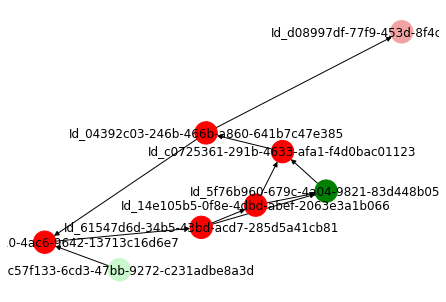

In [37]:
if len(steps)>=1:
    draw_process_graph(steps[0])

In [38]:
if len(steps)>=2:
    draw_process_graph(steps[1])

In [39]:
if len(steps)>=3:
    draw_process_graph(steps[2])

In [40]:
if len(steps)>=4:
    draw_process_graph(steps[3])